<a href="https://colab.research.google.com/github/deepak-ucfknight/Machine_Learning_Spring19/blob/master/Extending_keras_network_with_connected_component_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from skimage import util 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Input
from keras import layers
from keras import Model

In [112]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

x_train = x_train / 255;
x_test  = x_test  / 255;


for i in range(len(x_train)):
  a = x_train[i]
  for row in range(len(a)):
    for col in range(len(a[row])):
      if(a[row,col] != 0):
        a[row,col] = 1
        
for i in range(len(x_test)):
  a = x_test[i]
  for row in range(len(a)):
    for col in range(len(a[row])):
      if(a[row,col] != 0):
        a[row,col] = 1
  

(60000, 28, 28)


In [0]:
image_to_visualize = 8
index = -1

for i in range(len(y_train)):
  if y_train[i] == 8:
    index = i
    

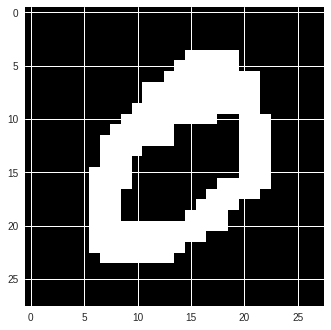

In [114]:

inverted_img = util.invert(x_train[1])
plt.imshow(inverted_img)

In [115]:
connected_components_train = np.zeros_like(y_train)
connected_components_test  = np.zeros_like(y_test)

print(connected_components_train.shape[0])

60000


In [0]:
for i in range(len(connected_components_train)):
  labeled, nr_objects = ndimage.label(util.invert(x_train[i]))
  connected_components_train[i] = nr_objects
  
for i in range(len(connected_components_test)):
  labeled, nr_objects = ndimage.label(util.invert(x_test[i]))
  connected_components_test[i] = nr_objects

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
rows = 28
cols = 28
num_classes = 10
batch_size = 32
input_dims = rows*cols
handcrafted_feature = 1

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)
    
x_train = x_train / 255;
x_test = x_test / 255;

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_train = y_train
y_test = y_test

In [0]:

input_shape = Input((input_dims,))
connected_component_feature = Input((handcrafted_feature,))

image_vector = Dense(64, activation='sigmoid')(input_shape)

model_final  = layers.add([image_vector, connected_component_feature])   

model_final  = Dense(10, activation='softmax')(model_final)

model_final  = Model([input_shape, connected_component_feature], model_final)


In [122]:
sgd = optimizers.SGD(lr=0.1)

model_final.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model_final.fit([x_train, connected_components_train], y_train, nb_epoch=20, batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 1.2109 - acc: 0.7519
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3201 - acc: 0.9060
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2623 - acc: 0.9231
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2387 - acc: 0.9305
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2160 - acc: 0.9355
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1952 - acc: 0.9420
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1819 - acc: 0.9456
Epoch 8/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1660 - acc: 0.9508
Epoch 9/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1546 - acc: 0.9536
Epoch 10/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1454 - acc: 0.9557

In [123]:
score = model_final.evaluate([x_test,connected_components_test], y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.12043727096058428
Test accuracy: 0.9637
